<a href="https://colab.research.google.com/github/sanu1230/Academic-Assignments/blob/master/KNN_Phishing_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> K Nearest Neighbours </h1>

## Table of Contents

1. [Phishing Site Detection](#dd)
2. [Importing the packages and dataset](#import)
3. [Splitting the data into Training and Test Set](#split)
4. [Building the KNN model](#build)
5. [Predictions from KNN model](#predict)
6. [Evaluating the model](#eval)
7. [Appendix](#appendix)

### 1. Phishing Site Detection  <a id='dd'>

In this dataset, we have collected the information about different websites inorder to classify them as phishing or legitimate websites.

** Column Description **

 	having_IP_Address's type is nominal, range is ('-1', '1')
 	URL_Length's type is nominal, range is ('1', '0', '-1')
 	Shortining_Service's type is nominal, range is ('1', '-1')
 	having_At_Symbol's type is nominal, range is ('1', '-1')
 	double_slash_redirecting's type is nominal, range is ('-1', '1')
 	Prefix_Suffix's type is nominal, range is ('-1', '1')
 	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
 	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
 	Domain_registeration_length's type is nominal, range is ('-1', '1')
 	Favicon's type is nominal, range is ('1', '-1')
 	port's type is nominal, range is ('1', '-1')
 	HTTPS_token's type is nominal, range is ('-1', '1')
 	Request_URL's type is nominal, range is ('1', '-1')
 	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
 	Links_in_tags's type is nominal, range is ('1', '-1', '0')
 	SFH's type is nominal, range is ('-1', '1', '0')
 	Submitting_to_email's type is nominal, range is ('-1', '1')
 	Abnormal_URL's type is nominal, range is ('-1', '1')
 	Redirect's type is nominal, range is ('0', '1')
 	on_mouseover's type is nominal, range is ('1', '-1')
 	RightClick's type is nominal, range is ('1', '-1')
 	popUpWidnow's type is nominal, range is ('1', '-1')
 	Iframe's type is nominal, range is ('1', '-1')
 	age_of_domain's type is nominal, range is ('-1', '1')
 	DNSRecord's type is nominal, range is ('-1', '1')
 	web_traffic's type is nominal, range is ('-1', '0', '1')
 	Page_Rank's type is nominal, range is ('-1', '1')
 	Google_Index's type is nominal, range is ('1', '-1')
 	Links_pointing_to_page's type is nominal, range is ('1', '0', '-1')
 	Statistical_report's type is nominal, range is ('-1', '1')
 	Result's type is nominal, range is ('-1', '1'))
    
    The  data coding is as follows:
    "1"  - Legitimate Website
    "0"  - Suspisious
    "-1" - Malicious Website
    
** Objective**

To predict the value of Result column and say whether the website is Malicious or Legitimate website.

### 2. Importing the packages and dataset  <a id='import'>

In [2]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Loading the data
phising_data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpX/Adv.ML Projects/KNN/Class_material/attachment_PhishingData_lyst4846.csv')

In [5]:
phising_data_frame.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
phising_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [7]:
# Names of all the columns

phising_data_frame.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [8]:
# Extracting the labels

labels = phising_data_frame["Result"].values
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [9]:
phising_data_frame["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

There are 6157 legitimate websites and 4898 Malicious websites

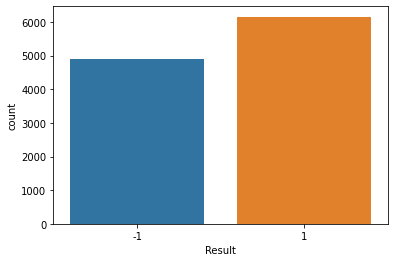

In [10]:
sns.countplot('Result', data = phising_data_frame)

In [11]:
# Extracting the features

print(phising_data_frame.columns[:-1])
features = phising_data_frame.columns[:-1]
predictors = phising_data_frame[features].values
predictors

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')


array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [12]:
corr = phising_data_frame.corr()

In [13]:
corr

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,0.803834,0.049483,-0.004620,0.037698,-0.100341,-0.012279,0.668317,0.071848,-0.015621,0.706179,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


There is some correlation between double_slash_redirecting and shortining_service.  <br>
There are some correlation between some values. But they won't be much useful as most of the features are categorical.

Since a lot of variables are categorical we havent performed any EDA on this.

### 2. Splitting the data into Training and Test Set   <a id='split'>

In [14]:
X = predictors
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 3. Building the KNN model   <a id='build'>

In [67]:
# Fitting the KNN Classifier on Training data
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = clf_knn.fit(X_train,y_train)

### 4. Prediction from KNN model    <a id='predict'>

In [68]:
y_pred = clf_knn.predict(X_test)

### 5. Evaluating the model   <a id='eval'>

**Cross Validation** is used to see how well a model performs in an independent dataset. Different samples are used for training and testing and the average accuracy score is calculated.

In [69]:
# Computing the Cross validation score with 5-fold cross validation

from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.92405063 0.91500904 0.89330922 0.92405063 0.89673913]
Cross Validation Mean score : 0.9106317320544068


** Classification Report **

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      1183
           1       0.95      0.93      0.94      1581

    accuracy                           0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



** Confusion Matrix **

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1102   81]
 [ 113 1468]]


** Accuracy **

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9298118668596237

### 6. Appendix   <a id='appendix'>
1. Use different counts of neighbours by setting value of k (5,7,9,11,13,15) <br/>
2. Perform CV(5) on each value of <b>k (k in kNN)</b> <br/>
3. Compare the <b>CV Score</b> to deduce the best model <br/>
4. Use the best value of k <br/>

In [ ]:
list_k = [5,7,9,11,13,15]

for k in list_k:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
    print("K: ", k)
    print("Cross Validation score : " + str(score_knn))
    print("Cross Validation Mean score : " + str(score_knn.mean()))
    print("")

K:  5
Cross Validation score : [0.92585895 0.91139241 0.90235081 0.90777577 0.91666667]
Cross Validation Mean score : 0.912808921036769

K:  7
Cross Validation score : [0.92585895 0.91862568 0.9005425  0.92585895 0.90217391]
Cross Validation Mean score : 0.9146119977985692

K:  9
Cross Validation score : [0.92585895 0.920434   0.90777577 0.92224231 0.90398551]
Cross Validation Mean score : 0.9160593075975575

K:  11
Cross Validation score : [0.92405063 0.92224231 0.90415913 0.91681736 0.9057971 ]
Cross Validation Mean score : 0.9146133081741226

K:  13
Cross Validation score : [0.91320072 0.92224231 0.90596745 0.91320072 0.90217391]
Cross Validation Mean score : 0.9113570249233431

K:  15
Cross Validation score : [0.91500904 0.92766727 0.90958409 0.91500904 0.89855072]
Cross Validation Mean score : 0.9131640328118038



Using the value of k=9, we have obtained the highest cross-validation accuracy of 0.916

**Lets try some more variations**

In [100]:
x= range(3, 51)
y = range(3, 21)
list1 = []
n = []
c = []

for i in list(x):
  clf_knn1 = KNeighborsClassifier(n_neighbors=i)
  clf_knn1 = clf_knn1.fit(X_train, y_train)
  for j in list(y):
    score_knn1 = cross_val_score(clf_knn1, X_test, y_test, cv=j)
    list1.append(str(score_knn1.mean()))
    n.append(i)
    c.append(j)

d = {'CVmeanscore':list1, 'n_neighbours':n, 'cv':c}
df = pd.DataFrame(d)
df = df[df['CVmeanscore']== df['CVmeanscore'].max()]
print(df.to_string(index=False))

        CVmeanscore  n_neighbours  cv
 0.9207558431766776             5   8


**Above i have tried around 1000 different variations and found the highest 'Cross validation Mean Score' as 0.92, with n_neighbors as '5' and cv as '8'**

# END